In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

C:\Users\jkash\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jkash\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\jkash\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data=pd.read_csv(r'D:\---janvi---\DataSets-master\KmeanClustering-main\Wholesalecustomersdata.csv')
data.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
data_feature=['Channel','Region']
data_feat=["Fresh","Milk","Grocery","Frozen","Detergents_Paper"]

In [5]:
for col in data_feature:
    dummies=pd.get_dummies(data[col],prefix=col)
    data=pd.concat([data,dummies],axis=1)
    data.drop(col,axis=1,inplace=True)

In [6]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [7]:
sum_square_error=[]
kk=range(1,15)
for k in kk:
    km=KMeans(n_clusters=k)
    km=km.fit(data)
    sum_square_error.append(km.inertia_)

C:\Users\jkash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


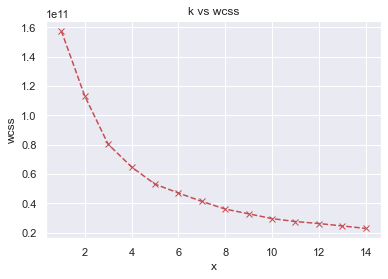

In [8]:
plt.plot(kk,sum_square_error,'rx--')
plt.xlabel("x")
plt.ylabel("wcss")
plt.title("k vs wcss")
plt.show()

In [9]:
model_km=KMeans(n_clusters=5)
model_km=model_km.fit(data)

In [10]:
data["Cluster"]=model_km.labels_

In [11]:
data.head(1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,Cluster
0,12669,9656,7561,214,2674,1338,0,1,0,0,1,1


In [12]:
def corrWith(f1,f2,data,hueVal="No"):
    if hueVal=="No":
        sns.lmplot(f1,f2,data=data,fit_reg=False,scatter_kws={"s":200})
        plt.title("Corr plot between {} and {} ".format(f1,f2))
        plt.xlabel(f1)
        plt.ylabel(f2)
        plt.show()
    else:
        sns.lmplot(f1,f2,data=data,fit_reg=False,scatter_kws={"s":200},hue=hueVal)
        plt.title("Corr plot between {} and {} ".format(f1,f2))
        plt.xlabel(f1)
        plt.ylabel(f2)
        plt.show()
    

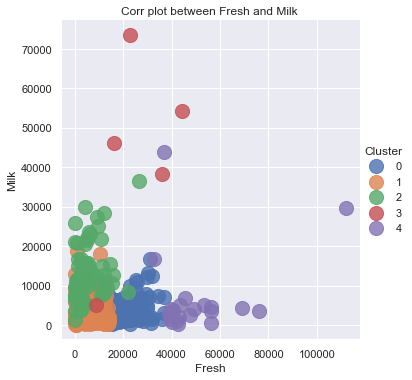

In [14]:
corrWith("Fresh","Milk",data,hueVal="Cluster")